# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [82]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
from selenium.webdriver.chrome.options import Options

import matplotlib.pyplot as plt
import pandas as pd


In [83]:
# CHANGE THE PATH AS PER CHROMEDRIVER LOCATION IN YOUR SYSTEM
driver_path="Users\elenamaksimova\Downloads\chromedriver-mac-arm64"

chrome_options = Options()
chrome_options.add_argument(f"webdriver.chrome.driver={driver_path}")

browser = Browser('chrome', options=chrome_options)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [84]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [85]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html,'html.parser')

In [86]:
# Find the table with the class 'table'
table = soup.find('table', class_='table')

# Create an empty list
rows = []

# Loop through the scraped data to create a list of rows
for row in table.find_all('tr')[1:]:  # Skip the header row
    row_data = [cell.text.strip() for cell in row.find_all('td')]
    rows.append(row_data)

# Display the table rows

for row in rows:
    print(row)

['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0']
['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0']
['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0']
['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0']
['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0']
['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0']
['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0']
['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0']
['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0']
['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0']
['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0']
['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0']
['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0']
['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0']
['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0']
['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0']
['171', '2012-09-04', '29', '166', '6', '-75.0', '747.0']
['172', '2012-09-05', '

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [87]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
# Specify column names
columns = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

# Create a Pandas DataFrame
mars_weather_df = pd.DataFrame(rows, columns=columns)

# Convert 'terrestrial_date' to datetime format
mars_weather_df['terrestrial_date'] = pd.to_datetime(mars_weather_df['terrestrial_date'])

# Display the DataFrame
mars_weather_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [33]:
# Examine data type of each column
print(mars_weather_df.dtypes)



terrestrial_date    datetime64[ns]
sol                         object
ls                          object
month                       object
min_temp                    object
pressure                    object
dtype: object


In [38]:
# Change data types for data analysis
mars_weather_df['terrestrial_date'] = pd.to_datetime(mars_weather_df['terrestrial_date'])

# Convert other columns to appropriate data types if needed
mars_weather_df['sol'] = mars_weather_df['sol'].astype(int)
mars_weather_df['ls'] = mars_weather_df['ls'].astype(int)
mars_weather_df['month'] = mars_weather_df['month'].astype(int)
mars_weather_df['min_temp'] = mars_weather_df['min_temp'].astype(float)
mars_weather_df['pressure'] = mars_weather_df['pressure'].astype(float)

# Confirm type changes were successful by examining data types again
print(mars_weather_df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [41]:
# 1. How many months are there on Mars?
# Convert 'month' column to string for formatting
mars_weather_df['month'] = mars_weather_df['month'].astype(str)

# Count the occurrences of each month and sort by month number
months_counts = mars_weather_df['month'].value_counts().sort_index()

# Display the result
print(months_counts)


month
1     174
10    112
11    138
12    166
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
Name: count, dtype: int64


In [43]:
# 2. How many Martian days' worth of data are there?

# Count the number of unique sols (Martian days)
number_of_martian_days = mars_weather_df['sol'].nunique()

# Display the result
print( number_of_martian_days)


1867


In [44]:
# 3. What is the average low temperature by month?

# Find the average minimum daily temperature for each month
monthly_avg_min_temp = mars_weather_df.groupby('month')['min_temp'].mean()

# Display the result

print(monthly_avg_min_temp)


month
1    -77.160920
10   -71.982143
11   -71.985507
12   -74.451807
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
Name: min_temp, dtype: float64


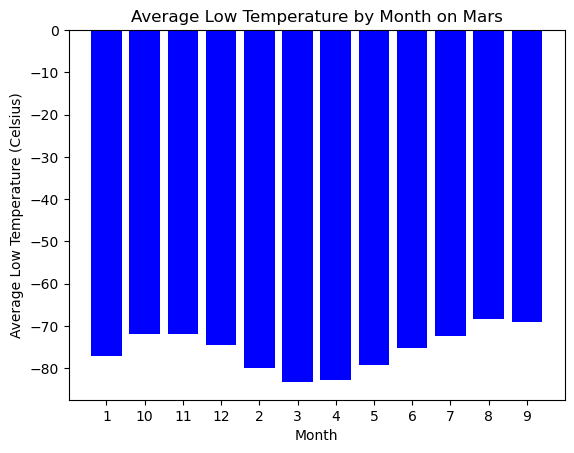

In [56]:
# Plot the average temperature by month

# Find the average minimum daily temperature for each month
monthly_avg_min_temp = mars_weather_df.groupby('month')['min_temp'].mean()

# Plot the results as a bar chart
plt.bar(monthly_avg_min_temp.index, monthly_avg_min_temp, color='blue')
plt.xlabel('Month')
plt.ylabel('Average Low Temperature (Celsius)')
plt.title('Average Low Temperature by Month on Mars')
plt.show()


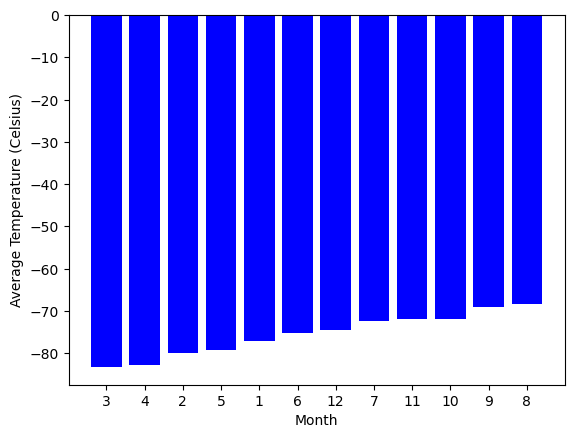

In [69]:
# Identify the coldest and hottest months
coldest_month = monthly_avg_min_temp.idxmin()
hottest_month = monthly_avg_min_temp.idxmax()

# Sort the months in descending order based on average temperature
sorted_months = monthly_avg_min_temp.sort_values(ascending=True)

# Plot the results as a bar chart
plt.bar(sorted_months.index, sorted_months, color='blue')
plt.xlabel('Month')
plt.ylabel('Average Temperature (Celsius)')

plt.show()


In [58]:
# 4. Average pressure by Martian month

monthly_avg_pressure = mars_weather_df.groupby('month')['pressure'].mean()

# Display the resultprint("Average Atmospheric Pressure by Martian Month:")
print(monthly_avg_pressure)


month
1     862.488506
10    887.312500
11    857.014493
12    842.156627
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
Name: pressure, dtype: float64


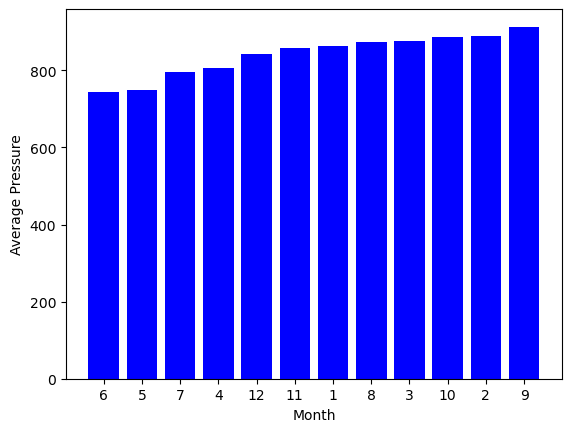

In [74]:
# Plot the average pressure by mont

# Sort the months in ascending order based on average pressure
months_pressure = monthly_avg_pressure.sort_values(ascending=True)

# Plot the results as a bar chart
plt.bar(months_pressure.index, months_pressure, color='blue')
plt.xlabel('Month')
plt.ylabel('Average Pressure')

plt.show()


Text(0, 0.5, ' Minimum Temperature (Celsius)')

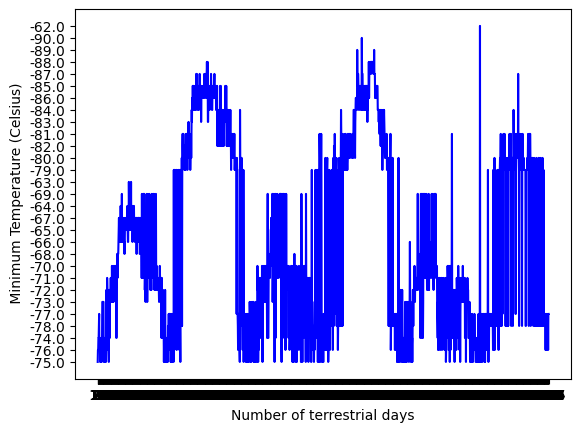

In [81]:
# 5. How many terrestrial (earth) days are there in a Martian year?

plt.plot(mars_weather_df['sol'], mars_weather_df['min_temp'], color='blue')
plt.xlabel('Number of terrestrial days')
plt.ylabel(' Minimum Temperature (Celsius)')


In [79]:
# 5. How many terrestrial (earth) days are there in a Martian year?


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [70]:
mars_weather_df.to_csv("../Resources/mars_weather_data.csv")

In [66]:
# Write the DataFrame to a CSV file
csv_file_path = /mars_weather_data.csv'


In [71]:
browser.quit()